<a href="https://colab.research.google.com/github/Leticia-Moraes-Souza/MVP_Sprint_Machine_Learning_Analytics/blob/main/MVP_Telecom_Churn_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Apresentação do problema
O dataset "Telecom Customer Churn Prediction" foi escolhido para a construção do MVP da disciplina de "Machine Learning & Analytics". Ele pode ser encontrado no repositório Kaggle no link: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/ e originalmente fazia parte de um desafio conduzido pela Maven Analytics (https://www.mavenanalytics.io/blog/maven-churn-challenge). Nele, estão contidas as informações de todos os clientes que em 2022 tinham serviços de telefonia ou internet contratados em uma empresa fictícia de Telecomunicações da California. O conjunto de dados foi integralmente carregado no repositório Github para uso nesse modelo.

Como a variável de interesse, representada na coluna "Customer Status", já está presente na base de dados, espera-se construir um modelo de aprendizado supervisionado com uso de técnicas de classificação e o objetivo de prever se um cliente permanecerá usando os produtos ou efetuará um cancelamento (churn). Como hipóteses, temos as possíveis perguntas:

1.	clientes pouco fidelizados (que possuem apenas um serviço - telefonia ou internet) tendem a apresentar maior taxa de cancelamento
2.	clientes que contrataram serviço de internet de tecnologias ultrapassadas (ex:cabo) cancelam mais seus produtos
3.	clientes que gastam mais com mensalidade apresentam maior churn


Espera-se que com as repostas para essas perguntas seja possível prever quais usuários estão propensos ao churn e assim traçar estratégias de retenção e, consequentemente, evitar o cancelamento.


# 2) Apresentação dos atributos do dataset
No conjunto de dados usados temos os seguintes atributos:

  •	Customer ID: código para identificação do cliente

  •	Gender: gênero (feminino ou masculino)

  •	Age: idade

  •	Married: informa se o cliente é casado ou não

  •	Number of Dependents: número de dependentes que vivem com o cliente

  •	City: cidade de residência

  •	Zip code: CEP

  •	Latitude: latitude em graus

  •	Longitude: longitude em graus

  •	Number of referrals: número de vezes que os clientes recomendaram os serviços da empresa para outras pessoas

  •	Tenure in months: tempo de permanência como cliente na empresa em meses

  •	Offer: indica o tipo de oferta feita pelo marketing contratada pelo cliente

  •	Phone service: indica se o cliente tem o serviço de telefonia fixa

  •	Avg Monthly Long Distance Charges: indica o valor médio pago por ligações de longa distância (dólares)

  •	Multiple lines: indica se o cliente tem múltiplas linhas telefônicas contratadas

  •	Internet service: indica se o cliente tem serviços de internet contratados

  •	Internet type: tipo de tecnologia de conexão para a internet

  •	Avg Monthly GB Download: indica a média de gigabites baixados pelo cliente

  •	Online security: indica se o cliente contratou um serviço extra de segurança online

  •	Online backup: indica se o cliente contratou um serviço extra de backup online

  •	Device protection plan: indica se o cliente contratou um serviço extra de proteção para seu equipamento de internet

  •	Premium tech support: indica se o cliente contratou um serviço extra de suporte técnico

  •	Streaming tv: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de tv

  •	Streaming movies: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de filmes

  •	Streaming music: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de música

  •	Unlimited data: indica se o cliente paga um valor adicional para ter acesso a dados ilimitados de internet para download e upload

  •	Contract: tipo de contrato do cliente (mensal, anual, etc)

  •	Parpeless Billing: indica se o tipo de cobrança é sem envio de boleto impresso

  •	Payment method: método de pagamento usado pelo cliente (ex: cartão de crédito)

  •	Total charges: valor total cobrado do cliente (dólar)

  •	Total refunds: valor de reembolso pago aos clientes (dólar)

  •	Total Extra Data Charges: valor extra cobrado pelo download extra de dados, além do especificado no plano contratado (dólar)

  •	Total Long Distance Charges: valor extra cobrado pelas ligações de longa distância (dólar)

  •	Total revenue: total de receita obtida pela empresa com cada cliente (dólar)

  •	Customer status: indica o estado do cliente na empresa: Joined (cliente novo), stayed (permaneceu como cliente), churned (cancelou os produtos)

  •	Churn category: macro motivos que levaram os clientes a cancelarem os seus produtos
  
  •	Churn reason: motivos detalhados que levaram ao cancelamento dos produtos





# 3) Análise do dataset

Primeiramente, vamos observar como esse dataset está organizado e suas principais características.

## 3.1) Importação das bibliotecas

Para iniciar a análise, começamos com a importação das bibliotecas Python que serão usadas.

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings


# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## 3.2) Importação do dataset
Para esse MVP, a tabela principal "telecom_customer_churn", disponibilizada no repositório online, foi carregada no Github com formato csv. Com o pacote Pandas, será realizada a carga do arquivo para análise.

In [2]:
# importação do dataset "Telecom Churn"

# url a ser importada
url_dados = "https://raw.githubusercontent.com/Leticia-Moraes-Souza/MVP_Sprint_Machine_Learning_Analytics/main/telecom_customer_churn.csv"
# carga do dataset através da url
df = pd.read_csv(url_dados)


# verificando se churn é um dataframe
type(df)

pandas.core.frame.DataFrame

## 3.3) Análises iniciais
Após a importação da base, vamos conferir se os dados foram carregados com sucesso, exibindo suas primeiras e últimas linhas como exemplo.

In [3]:
# exibindo primeiras 10 linhas do dataframe
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [4]:
# exibindo 10 últimas linhas do dataframe
df.tail(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,...,Bank Withdrawal,84.95,4018.05,0.0,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


Podemos notar que as informações foram carregadas com sucesso, apesar de não terem sido exibidas todos os cabeçalhos de coluna na amostra de exemplo. Também já podemos notar que nesse conjunto de dados, existem variáveis categóricas (ex: City) e numéricas (ex: Age). Além disso, aparentemente há casos de missings (valores NAN na coluna "Churn category").

Vamos continuar olhando mais algumas características gerais desse conjunto de dados, como suas dimensões, os atributos presentes e tipos de atributos.

In [5]:
# mostrando as dimensões do dataset (quantidades de linhas, colunas)
df.shape

(7043, 38)

In [6]:
# exibindo o nome das colunas
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [7]:
# mostrando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

De acordo com as análises iniciais percebe-se que o dataframe "churn" possui 38
colunas e 7043 linhas. Novamente, observamos possíveis missings nas colunas que possuem menor contagem de valores não nulos. A maioria dos dados são do tipo object e há dados numéricos inteiros (int) e decimais (float).

Vamos analisar então algumas estatísticas descritivas das variáveis numéricas.

In [8]:
 # resumo estatistico do dataset
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Aqui, um ponto de atenção é a presença de valores negativos na coluna "Monthly Charge", uma vez que o valor mínimo presente nesse campo é -10, o que pode indicar a presença de valores que deverão ser desconsiderados ou substituídos na análise.

Vamos verificar também se as classes do dataset estão balanceadas ou se será necessário algum tratamento posterior.

In [9]:
# verificando a distribuição das classes
df.groupby("Customer Status").size()

Customer Status
Churned    1869
Joined      454
Stayed     4720
dtype: int64

Podemos observar que as classes estão desbalanceadas com uma concentração maior de clientes que permaneceram (Stayed) usando os produtos contratados. É importante levar essa informação em consideração ao separar o conjunto de dados entre conjunto de treino e teste.

# 4) Pré processamento de dados


Inicialmente, vamos remover algumas colunas que possuem informações mais detalhadas, mas que não estão relacionadas as hipóteses do problema. Também vamos retirar o status "Joined" pois nesse momento não estamos interessados em observar o comportamento de clientes novos.

In [10]:
# retirando colunas com informações desnecessárias para essa análise
telecom = df.drop(columns = ["Customer ID", "City", "Latitude", "Longitude","Married"], axis = 0)
# conferindo primeiras linhas do dataframe com o tratamento
telecom.head()

,Gender,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,0,93225,2,9,NaN,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,0,91206,0,9,NaN,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,0,92627,0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,0,94553,1,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,0,93010,3,3,NaN,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [11]:
#retirando status "Joined"
telecom = telecom[telecom["Customer Status"] != "Joined"]
# verificando a distribuição das classes
telecom.groupby("Customer Status").size()
# conferindo primeiras linhas do dataframe com o tratamento
telecom.head()

,Gender,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,0,93225,2,9,NaN,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,0,91206,0,9,NaN,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,0,92627,0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,0,94553,1,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,0,93010,3,3,NaN,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## 4.1) Tratamento de missing
Para iniciar a etapa de pré procesamento de dados, vamos tratar os valores faltantes do dataset.


In [12]:
# verificando nulls no dataset
telecom.isnull().sum()

Gender                                  0
Age                                     0
Number of Dependents                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3598
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                    

<Axes: >

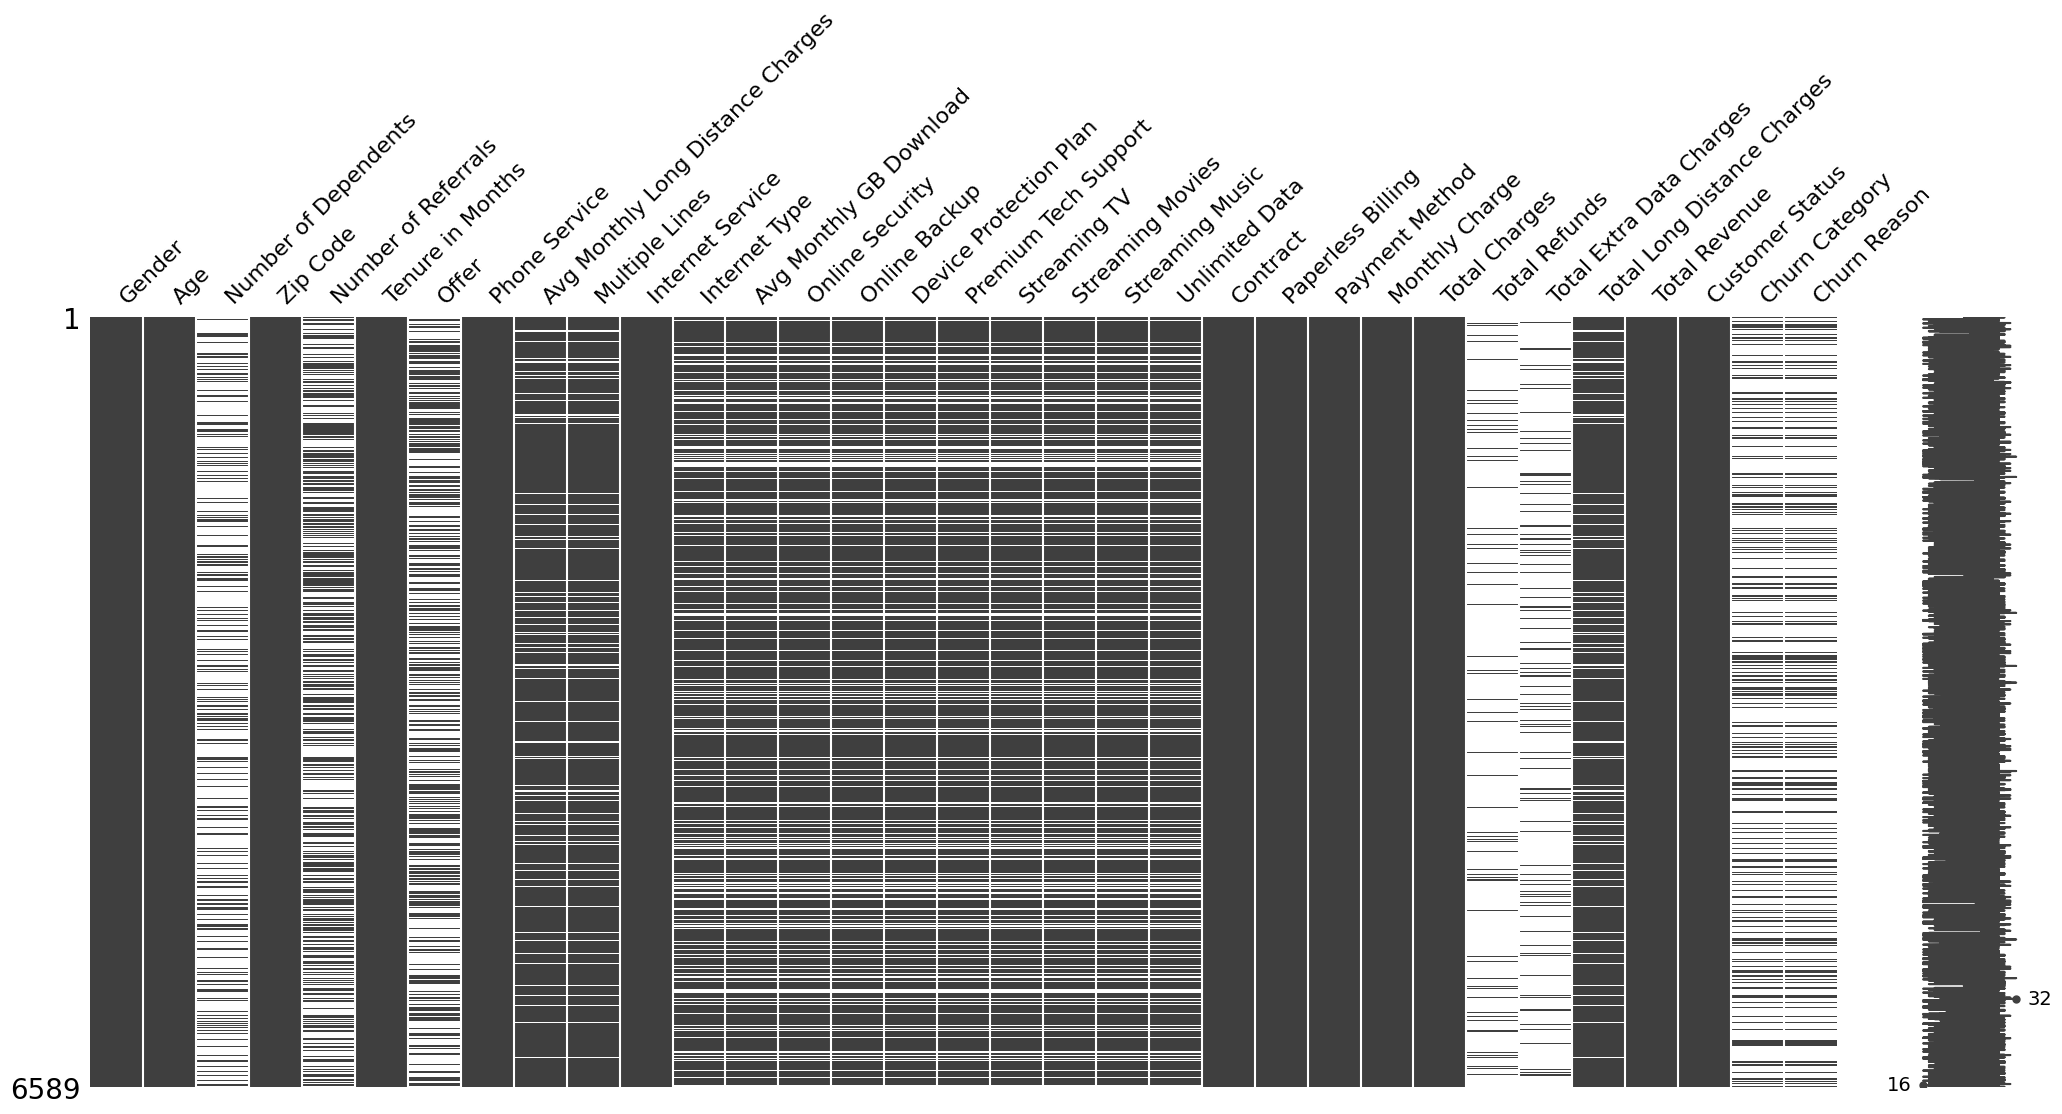

In [13]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(telecom.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = telecom[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Podemos observar as colunas que possuem valores faltantes pela presença de linhas brancas. No dataset, as colunas referentes ao uso de telefonia (Ex: Multiple Lines) estão com valores em branco nos clientes que não possuem esse tipo de serviço. O mesmo ocorre para os atributos referentes ao produto internet (Ex: Streaming Music), para aqueles que não contrataram esse serviço. Vamos então substituir os missings pelos valores mais adequados para cada coluna.

In [14]:
# substituindo os NAs por 0 nas colunas nas quais os dados coletados podem assumir esse valor
# observando o banco de dados, as colunas com valores missing relacionadas ao uso de internet
# estão em branco devido aos clientes não possuírem esse serviço
# o mesmo é observado para o as colunas relacionadas ao uso de telefonia
# então vamos criar novas categorias para sinalizar esses casos

datasetSemMissings['Number of Dependents'].fillna(0, inplace = True)
datasetSemMissings['Number of Referrals'].fillna(0, inplace = True)
datasetSemMissings['Offer'].fillna('No information', inplace = True)
datasetSemMissings['Avg Monthly Long Distance Charges'].fillna(0, inplace = True)
datasetSemMissings['Multiple Lines'].fillna('No phone service', inplace = True)
datasetSemMissings['Internet Type'].fillna('No internet', inplace = True)
datasetSemMissings['Avg Monthly GB Download'].fillna(0, inplace = True)
datasetSemMissings['Online Security'].fillna('No internet', inplace = True)
datasetSemMissings['Online Backup'].fillna('No internet', inplace = True)
datasetSemMissings['Device Protection Plan'].fillna('No internet', inplace = True)
datasetSemMissings['Premium Tech Support'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming TV'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming Movies'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming Music'].fillna('No internet', inplace = True)
datasetSemMissings['Unlimited Data'].fillna('No internet', inplace = True)
datasetSemMissings['Total Refunds'].fillna(0, inplace = True)
datasetSemMissings['Total Long Distance Charges'].fillna(0, inplace = True)
datasetSemMissings['Total Extra Data Charges'].fillna(0, inplace = True)
datasetSemMissings['Churn Category'].fillna('No churn', inplace = True)
datasetSemMissings['Churn Reason'].fillna('No churn', inplace = True)


Vamos plotar novamente a matriz para observar se os valores foram devidamente preenchidos.

<Axes: >

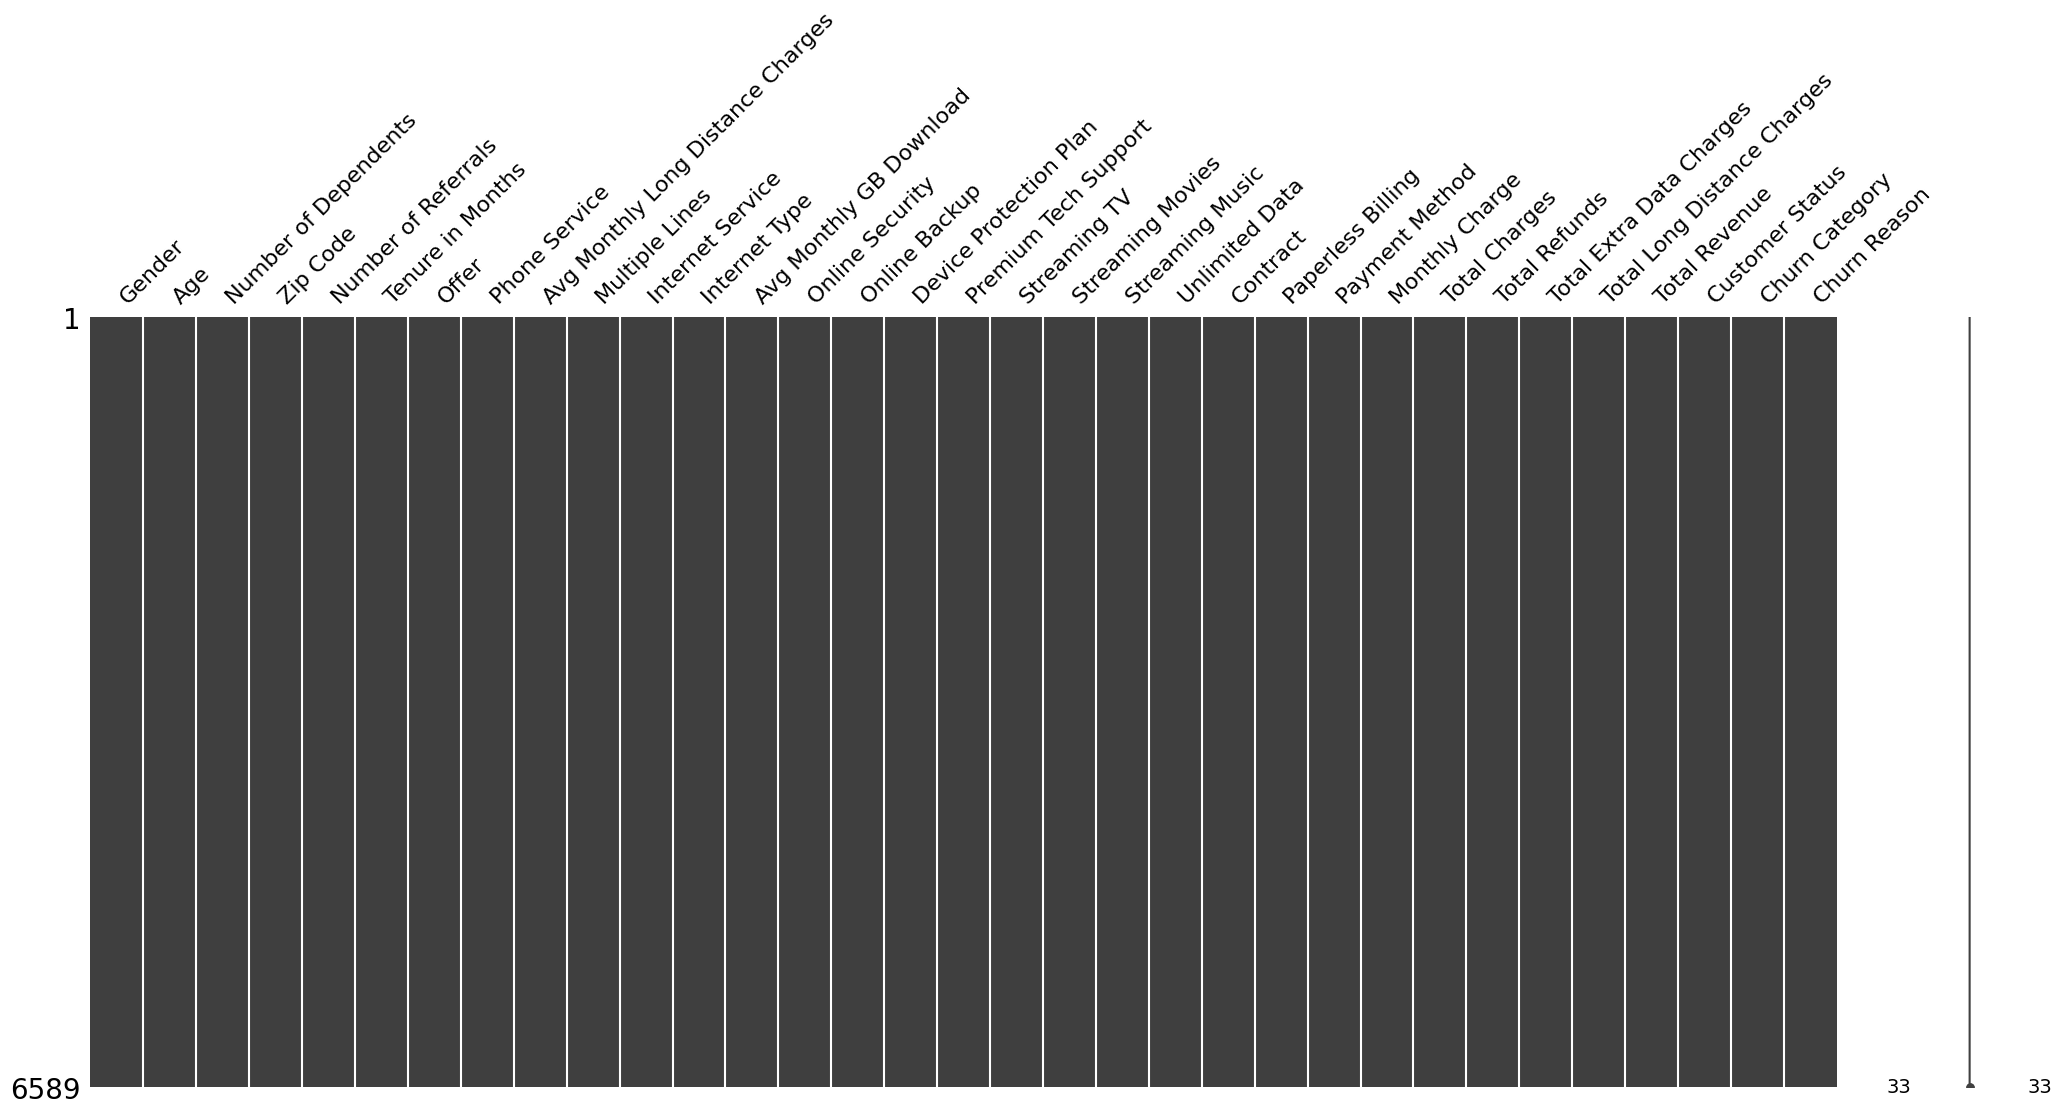

In [15]:
# verificando nulls no dataset
datasetSemMissings.isnull().sum()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Vimos que não há mais valores faltantes nas colunas do dataset.

## 4.2) Transformação de variáveis categóricas
Agora, vamos transformar as colunas de variáveis categóricas por variáveis numéricas, para posteriormente facilitar a criação do modelo de aprendizado. Para isso, iremos inicialmente observar os valores únicos assumidos em cada coluna.

In [16]:
# salvando um novo dataset para substituição de variáveis categóricas por numéricas

# recuperando os nomes das colunas
col = list(datasetSemMissings.columns)

# o novo dataset irá conter todas as colunas do dataset sem missing
dataset_numerico = datasetSemMissings[col[:]]

# conferindo criação do novo dataset
dataset_numerico.head()

,Gender,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,0.0,93225,2.0,9,No information,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0.0,381.51,974.81,Stayed,No churn,No churn
1,Male,46,0.0,91206,0.0,9,No information,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10.0,96.21,610.28,Stayed,No churn,No churn
2,Male,50,0.0,92627,0.0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0.0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,0.0,94553,1.0,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0.0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,0.0,93010,3.0,3,No information,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0.0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [17]:
#verificando valores unicos das colunas com variáveis categóricas
def unique_values_names(dataset_numerico):
    for column in dataset_numerico:
        if dataset_numerico[column].dtype=='object':
            print(f'{column}:{dataset_numerico[column].unique()}')

In [18]:
unique_values_names(dataset_numerico)

Gender:['Female' 'Male']
Offer:['No information' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service:['Yes' 'No']
Multiple Lines:['No' 'Yes' 'No phone service']
Internet Service:['Yes' 'No']
Internet Type:['Cable' 'Fiber Optic' 'DSL' 'No internet']
Online Security:['No' 'Yes' 'No internet']
Online Backup:['Yes' 'No' 'No internet']
Device Protection Plan:['No' 'Yes' 'No internet']
Premium Tech Support:['Yes' 'No' 'No internet']
Streaming TV:['Yes' 'No' 'No internet']
Streaming Movies:['No' 'Yes' 'No internet']
Streaming Music:['No' 'Yes' 'No internet']
Unlimited Data:['Yes' 'No' 'No internet']
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned']
Churn Category:['No churn' 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Churn Reason:['No churn' 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited rang

In [19]:
# substituindo valores nas colunas de variáveis categóricas


# substituindo coluna Gender
dataset_numerico["Gender"] = np.where(dataset_numerico["Gender"] == "Female", 0, 1)

# substituindo coluna Offer
dataset_numerico["Offer"] = np.where(dataset_numerico["Offer"] == "No information", 0,
                                       np.where(dataset_numerico["Offer"] == "Offer A", 1,
                                                np.where(dataset_numerico["Offer"] == "Offer B", 2,
                                                         np.where(dataset_numerico["Offer"] == "Offer C", 3,
                                                                  np.where(dataset_numerico["Offer"] == "Offer D", 4, 5)))))

# substituindo coluna Phone Service
dataset_numerico["Phone Service"] = np.where(dataset_numerico["Phone Service"] == "No", 0, 1)

# substituindo coluna Multiple Lines.
# como os valores "No" e "No phone service" indicam que o cliente não tem várias linhas telefonicas,
# vamos substituir pelo mesmo valor = 0
dataset_numerico["Multiple Lines"] = np.where(dataset_numerico["Multiple Lines"] == "No", 0,
                                                np.where(dataset_numerico["Multiple Lines"] == "No phone service", 0, 1))

# substituindo coluna Internet Service
dataset_numerico["Internet Service"] = np.where(dataset_numerico["Internet Service"] == "No", 0, 1)

# substituindo coluna Internet Type
dataset_numerico["Internet Type"] = np.where(dataset_numerico["Internet Type"] == "No internet", 0,
                                       np.where(dataset_numerico["Internet Type"] == "Cable", 1,
                                                np.where(dataset_numerico["Internet Type"] == "Fiber Optic", 2,3)))

# da mesma forma que a coluna Multiple Lines, nas colunas Online Security,
# Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV,Streaming Movies,
# Streaming Music e Unlimited Data os valores "No" e "No internet" sinalizam que os clientes não tem esses serviços
# logo, vão assumir o mesmo valor = 0

# substituindo coluna Online Security
dataset_numerico["Online Security"] = np.where(dataset_numerico["Online Security"] == "No", 0,
                                                np.where(dataset_numerico["Online Security"] == "No internet", 0, 1))

# substituindo coluna Online Backup
dataset_numerico["Online Backup"] = np.where(dataset_numerico["Online Backup"] == "No", 0,
                                                np.where(dataset_numerico["Online Backup"] == "No internet", 0, 1))

# substituindo coluna Device Protection Plan
dataset_numerico["Device Protection Plan"] = np.where(dataset_numerico["Device Protection Plan"] == "No", 0,
                                                np.where(dataset_numerico["Device Protection Plan"] == "No internet", 0, 1))

# substituindo coluna Premium Tech Support
dataset_numerico["Premium Tech Support"] = np.where(dataset_numerico["Premium Tech Support"] == "No", 0,
                                                np.where(dataset_numerico["Premium Tech Support"] == "No internet", 0, 1))

# substituindo coluna Streaming TV
dataset_numerico["Streaming TV"] = np.where(dataset_numerico["Streaming TV"] == "No", 0,
                                                np.where(dataset_numerico["Streaming TV"] == "No internet", 0, 1))

# substituindo coluna Streaming Movies
dataset_numerico["Streaming Movies"] = np.where(dataset_numerico["Streaming Movies"] == "No", 0,
                                                np.where(dataset_numerico["Streaming Movies"] == "No internet", 0, 1
                                                         ))
# substituindo coluna Streaming Music
dataset_numerico["Streaming Music"] = np.where(dataset_numerico["Streaming Music"] == "No", 0,
                                                np.where(dataset_numerico["Streaming Music"] == "No internet", 0, 1))

# substituindo coluna Unlimited Data
dataset_numerico["Unlimited Data"] = np.where(dataset_numerico["Unlimited Data"] == "No", 0,
                                                np.where(dataset_numerico["Unlimited Data"] == "No internet", 0, 1))

# substituindo coluna Contract
dataset_numerico["Contract"] = np.where(dataset_numerico["Contract"] == "One Year", 0,
                                                np.where(dataset_numerico["Contract"] == "Month-to-Month", 1, 2))

# substituindo coluna Paperless Billing
dataset_numerico["Paperless Billing"] = np.where(dataset_numerico["Paperless Billing"] == "No", 0, 1)

# substituindo coluna Payment Method
dataset_numerico["Payment Method"] = np.where(dataset_numerico["Payment Method"] == "Credit Card", 0,
                                                np.where(dataset_numerico["Payment Method"] == "Bank Withdrawal", 1, 2))

# substituindo coluna Customer Status
dataset_numerico["Customer Status"] = np.where(dataset_numerico["Customer Status"] == "Churned", 1, 0)



In [20]:
# verificando dataset após substituições
dataset_numerico.head()

,Gender,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,37,0.0,93225,2.0,9,0,1,42.39,0,...,0,65.6,593.30,0.00,0.0,381.51,974.81,0,No churn,No churn
1,1,46,0.0,91206,0.0,9,0,1,10.69,1,...,0,-4.0,542.40,38.33,10.0,96.21,610.28,0,No churn,No churn
2,1,50,0.0,92627,0.0,4,5,1,33.65,0,...,1,73.9,280.85,0.00,0.0,134.60,415.45,1,Competitor,Competitor had better devices
3,1,78,0.0,94553,1.0,13,4,1,27.82,0,...,1,98.0,1237.85,0.00,0.0,361.66,1599.51,1,Dissatisfaction,Product dissatisfaction
4,0,75,0.0,93010,3.0,3,0,1,7.38,0,...,0,83.9,267.40,0.00,0.0,22.14,289.54,1,Dissatisfaction,Network reliability


As variáveis categóricas foram substituídas com sucesso. Vamos retirar a coluna "Churn Category" e "Churn reason", visto que elas estarão altamente relacionadas com a coluna alvo e podem atrapalhar o modelo de aprendizado.

In [21]:
# retirando colunas com informações que podem atrapalhar na construção do modelo
dataset_numerico = dataset_numerico.drop(columns = ["Churn Category","Churn Reason"], axis = 0)
# verificando dataset após alteração
dataset_numerico.head()

,Gender,Age,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,0.0,93225,2.0,9,0,1,42.39,0,...,0,1,0,65.6,593.30,0.00,0.0,381.51,974.81,0
1,1,46,0.0,91206,0.0,9,0,1,10.69,1,...,1,0,0,-4.0,542.40,38.33,10.0,96.21,610.28,0
2,1,50,0.0,92627,0.0,4,5,1,33.65,0,...,1,1,1,73.9,280.85,0.00,0.0,134.60,415.45,1
3,1,78,0.0,94553,1.0,13,4,1,27.82,0,...,1,1,1,98.0,1237.85,0.00,0.0,361.66,1599.51,1
4,0,75,0.0,93010,3.0,3,0,1,7.38,0,...,1,1,0,83.9,267.40,0.00,0.0,22.14,289.54,1


## 4.3) Tratamento de valores negativos
Como foi observado nas análises iniciais do dataset, a coluna Monthly Charge possui valor mínimo negativo, o que pode indicar um possível erro na obtenção de dados, visto não ser possível fazer uma cobrança negativa. Assim, vamos substituir os valores negativos pela média dos valores da coluna.

In [22]:
# substituindo valores negativos
dataset_numerico["Monthly Charge"] = np.where(dataset_numerico["Monthly Charge"] < 0,
                                              dataset_numerico["Monthly Charge"].mean(),
                                                dataset_numerico["Monthly Charge"])
# conferindo a substituição
dataset_numerico["Monthly Charge"].describe()


count    6589.000000
mean       66.250531
std        29.658192
min        18.250000
25%        43.300000
50%        71.050000
75%        90.400000
max       118.750000
Name: Monthly Charge, dtype: float64

Observamos que o valor mínimo da coluna foi alterado e não apresenta mais valor negativo. Também houve mudança nos valores de média, desvio padrão e nos valores que definem cada quartil, quando comparados a coluna Monthly Charge do dataset original.

# 5) Preparação para construção do modelo de aprendizado
Para a resolução desse problema iremos usar o modelo de classificação analisando os parâmetros que resultam em melhor acurácia.

## 5.1) Importação das bibliotecas
Iniciaremos importando as bibliotecas necessárias.

In [23]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#6) Modelo dataset completo

Iremos separar o conjunto de dados entre uma amostra para construção do modelo (80%) e uma amostra para validação posterior (20%), o que permitirá verificar o seu desempenho com novos dados.
Usaremos a estratégia train-test-split e inicialmente iremos sinalizar quais são as colunas de atributos (X - 0 a 29) e qual é a coluna das classes (Y - 30). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

Será usada a estratégia de validação cruzada estratificada, uma vez que é uma forma de evitar que o modelo apresente overfitting e absorva os ruídos da base de treino. Também é necessário estratificação, pois as classes estão desequilibradas.


##6.1) Separação entre treino e teste

In [24]:
# index da coluna alvo
dataset_numerico.columns.get_loc("Customer Status")


30

In [25]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset após tratamentos)
array = dataset_numerico.values
X = array[:,0:30]
Y = array[:,30]

# separando os conjuntos treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=test_size, shuffle=True, random_state=seed)

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
# usando estratificação, visto que o dataset está com as classes desbalanceadas
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # faz o particionamento em 10 folds


## 6.2) Construção do modelo de aprendizagem

Iremos comparar a acurácia usando o dataset completo e diferentes modelos de classificação para chegar ao melhor resultado.

LR: 0.808007 (0.016169)
KNN: 0.763235 (0.010123)
CART: 0.815024 (0.015019)
NB: 0.789606 (0.012555)
SVM: 0.717701 (0.000749)
Bagging: 0.868715 (0.009405)
RF: 0.861885 (0.008703)
ET: 0.859611 (0.008917)
Ada: 0.862266 (0.009590)
GB: 0.877254 (0.009517)
Voting: 0.827167 (0.012253)


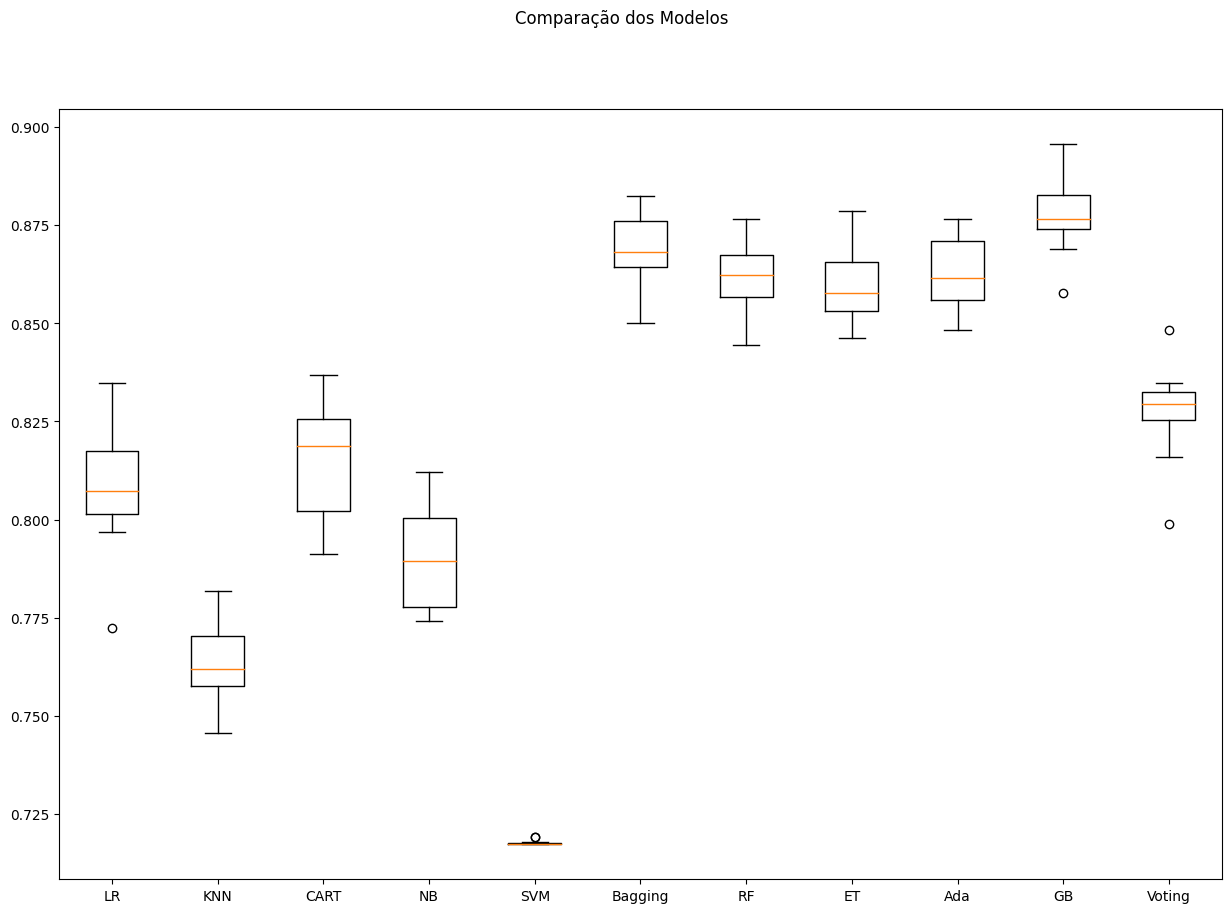

In [26]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Usando todos os atributos do modelo, a maior acurácia foi observada no ensemble GradientBoostingClassifier. Considerando o desvio padrão, a acurácia estaria no intervalo de 85,82% e 89,63%, com média de 87,72%.

Iremos observar como os dados normalizados e padronizados desempenham.


##6.2) Dados padronizados e normalizados

LR-orig: 0.80801 (0.01617)
KNN-orig: 0.76323 (0.01012)
CART-orig: 0.81502 (0.01502)
NB-orig: 0.78961 (0.01255)
SVM-orig: 0.71770 (0.00075)
Bag-orig: 0.86872 (0.00941)
RF-orig: 0.86188 (0.00870)
ET-orig: 0.85961 (0.00892)
Ada-orig: 0.86227 (0.00959)
GB-orig: 0.87725 (0.00952)
Vot-orig: 0.82717 (0.01225)
LR-padr: 0.82831 (0.00973)
KNN-padr: 0.78505 (0.01403)
CART-padr: 0.81920 (0.01424)
NB-padr: 0.79207 (0.01167)
SVM-padr: 0.83608 (0.01222)
Bag-padr: 0.86606 (0.00907)
RF-padr: 0.86435 (0.01022)
ET-padr: 0.85828 (0.00837)
Ada-padr: 0.86227 (0.00959)
GB-padr: 0.87744 (0.00945)
Vot-padr: 0.84121 (0.00911)
LR-norm: 0.82489 (0.01150)
KNN-norm: 0.77443 (0.02221)
CART-norm: 0.82015 (0.01060)
NB-norm: 0.79207 (0.01167)
SVM-norm: 0.83172 (0.00891)
Bag-norm: 0.86511 (0.00941)
RF-norm: 0.86132 (0.01087)
ET-norm: 0.86075 (0.01043)
Ada-norm: 0.86227 (0.00959)
GB-norm: 0.87744 (0.00945)
Vot-norm: 0.83552 (0.00956)


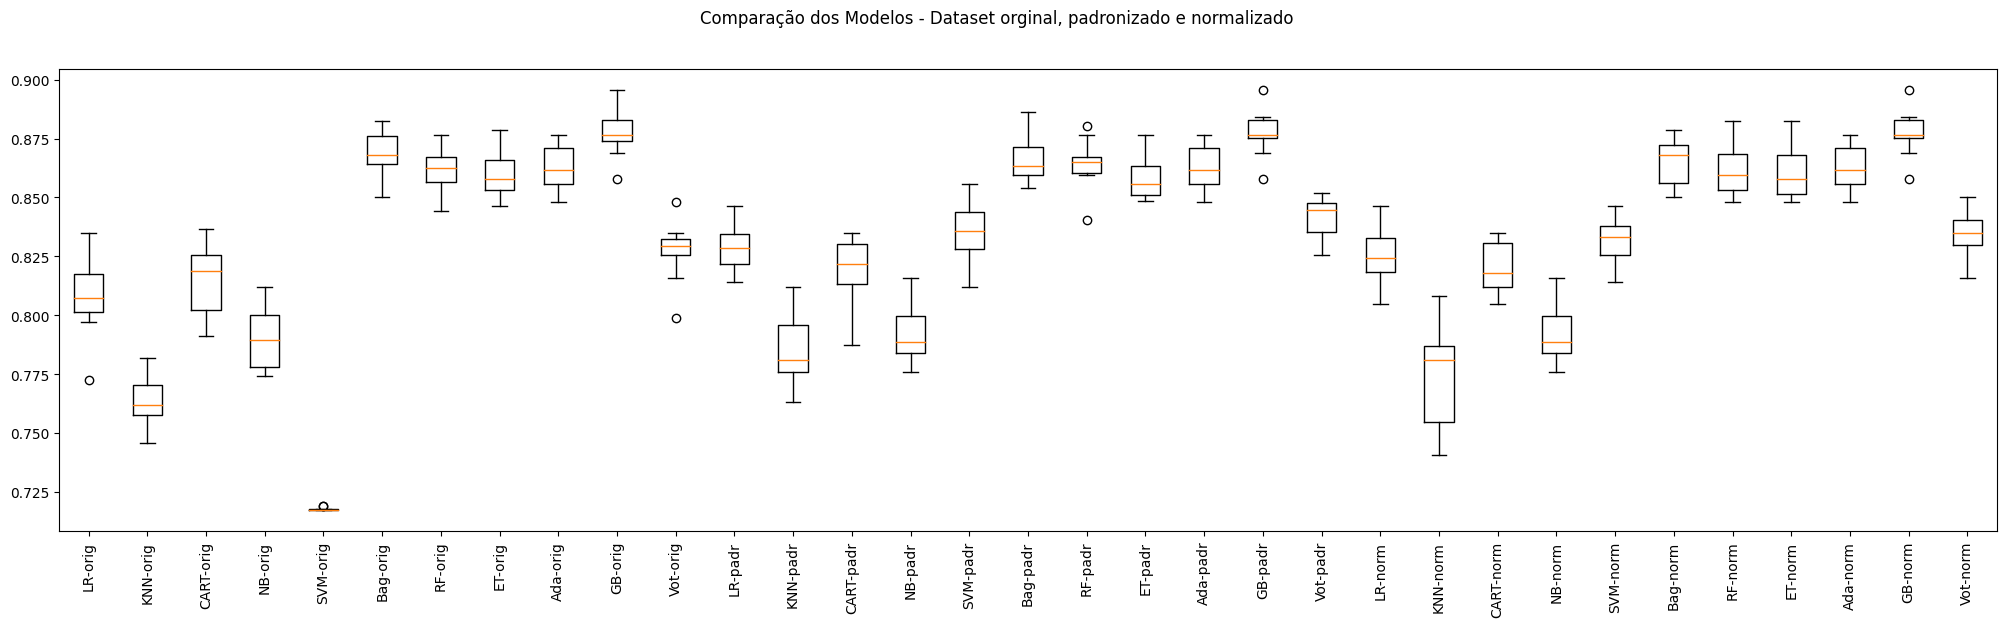

In [27]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 5 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Considerando os dados normalizados e padronizados, os modelos com melhor acurácia foram o GradientBoostingClassifier com dados normalizados e padronizados (acurácia média 87,74%, com intervalo entre 85,85% e 89,63%).

Vamos realizar a otimização de hiperparâmetros para observar se conseguimos melhorar esse desempenho.


##6.3) Otimização de hiperparâmetros

Para a otimização de hiperparâmetros, vamos variar os valores de:
- taxa de aprendizado;
- número de interações;
- número de nós

para verificar se há uma combinação que resulta em melhor performance.

In [28]:
# Tuning do GradientBoosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

params = {
    'GB__learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
    'GB__n_estimators': [100,200,300],
    'GB__max_depth': [3,5,7]
}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, n_jobs = -1, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

GB-orig - Melhor: 0.881238 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 200}
GB-padr - Melhor: 0.881238 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 200}
GB-norm - Melhor: 0.881238 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 200}


A otimização de hiperparâmetros resultou em um melhor resultado de acurácia para a taxa de aprendizado igual a 0,1, e 200 interações do tipo boosting.
Como a acurácia foi igual para os dados originais, normalizados e para os dados padronizados, pode-se entender que não é necessária essa transformação e utilizaremos os dados originais nas análises futuras.

Mas o uso de todas as informações disponíveis no dataset pode gerar overfitting. Para evitar que isso ocorra, vamos analisar os modelos usando o recurso de feature selection.


#7) Feature Selection
Iremos selecionar atributos de acordo com sua relação com o target e retirar as colunas irrelevantes. Assim, é possível analisar se há um melhor desempenho nos modelos e, possivelmente, evitar overfitting.


##7.1) Feature Selection: Correlação
Inicialmente, vamos plotar a matriz de correlação para o dataset, para observar quais atributos estão mais relacionados com a variável de interesse e ajudar na decisão de quais features serão mantidas.

Vamos considerar os ranges de valores que determinam se uma correlação é fraca, média ou forte (http://leg.ufpr.br/~silvia/CE003/node74.html) como sendo:


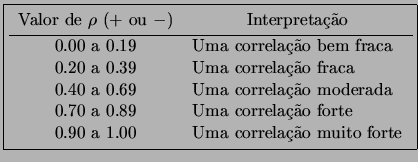


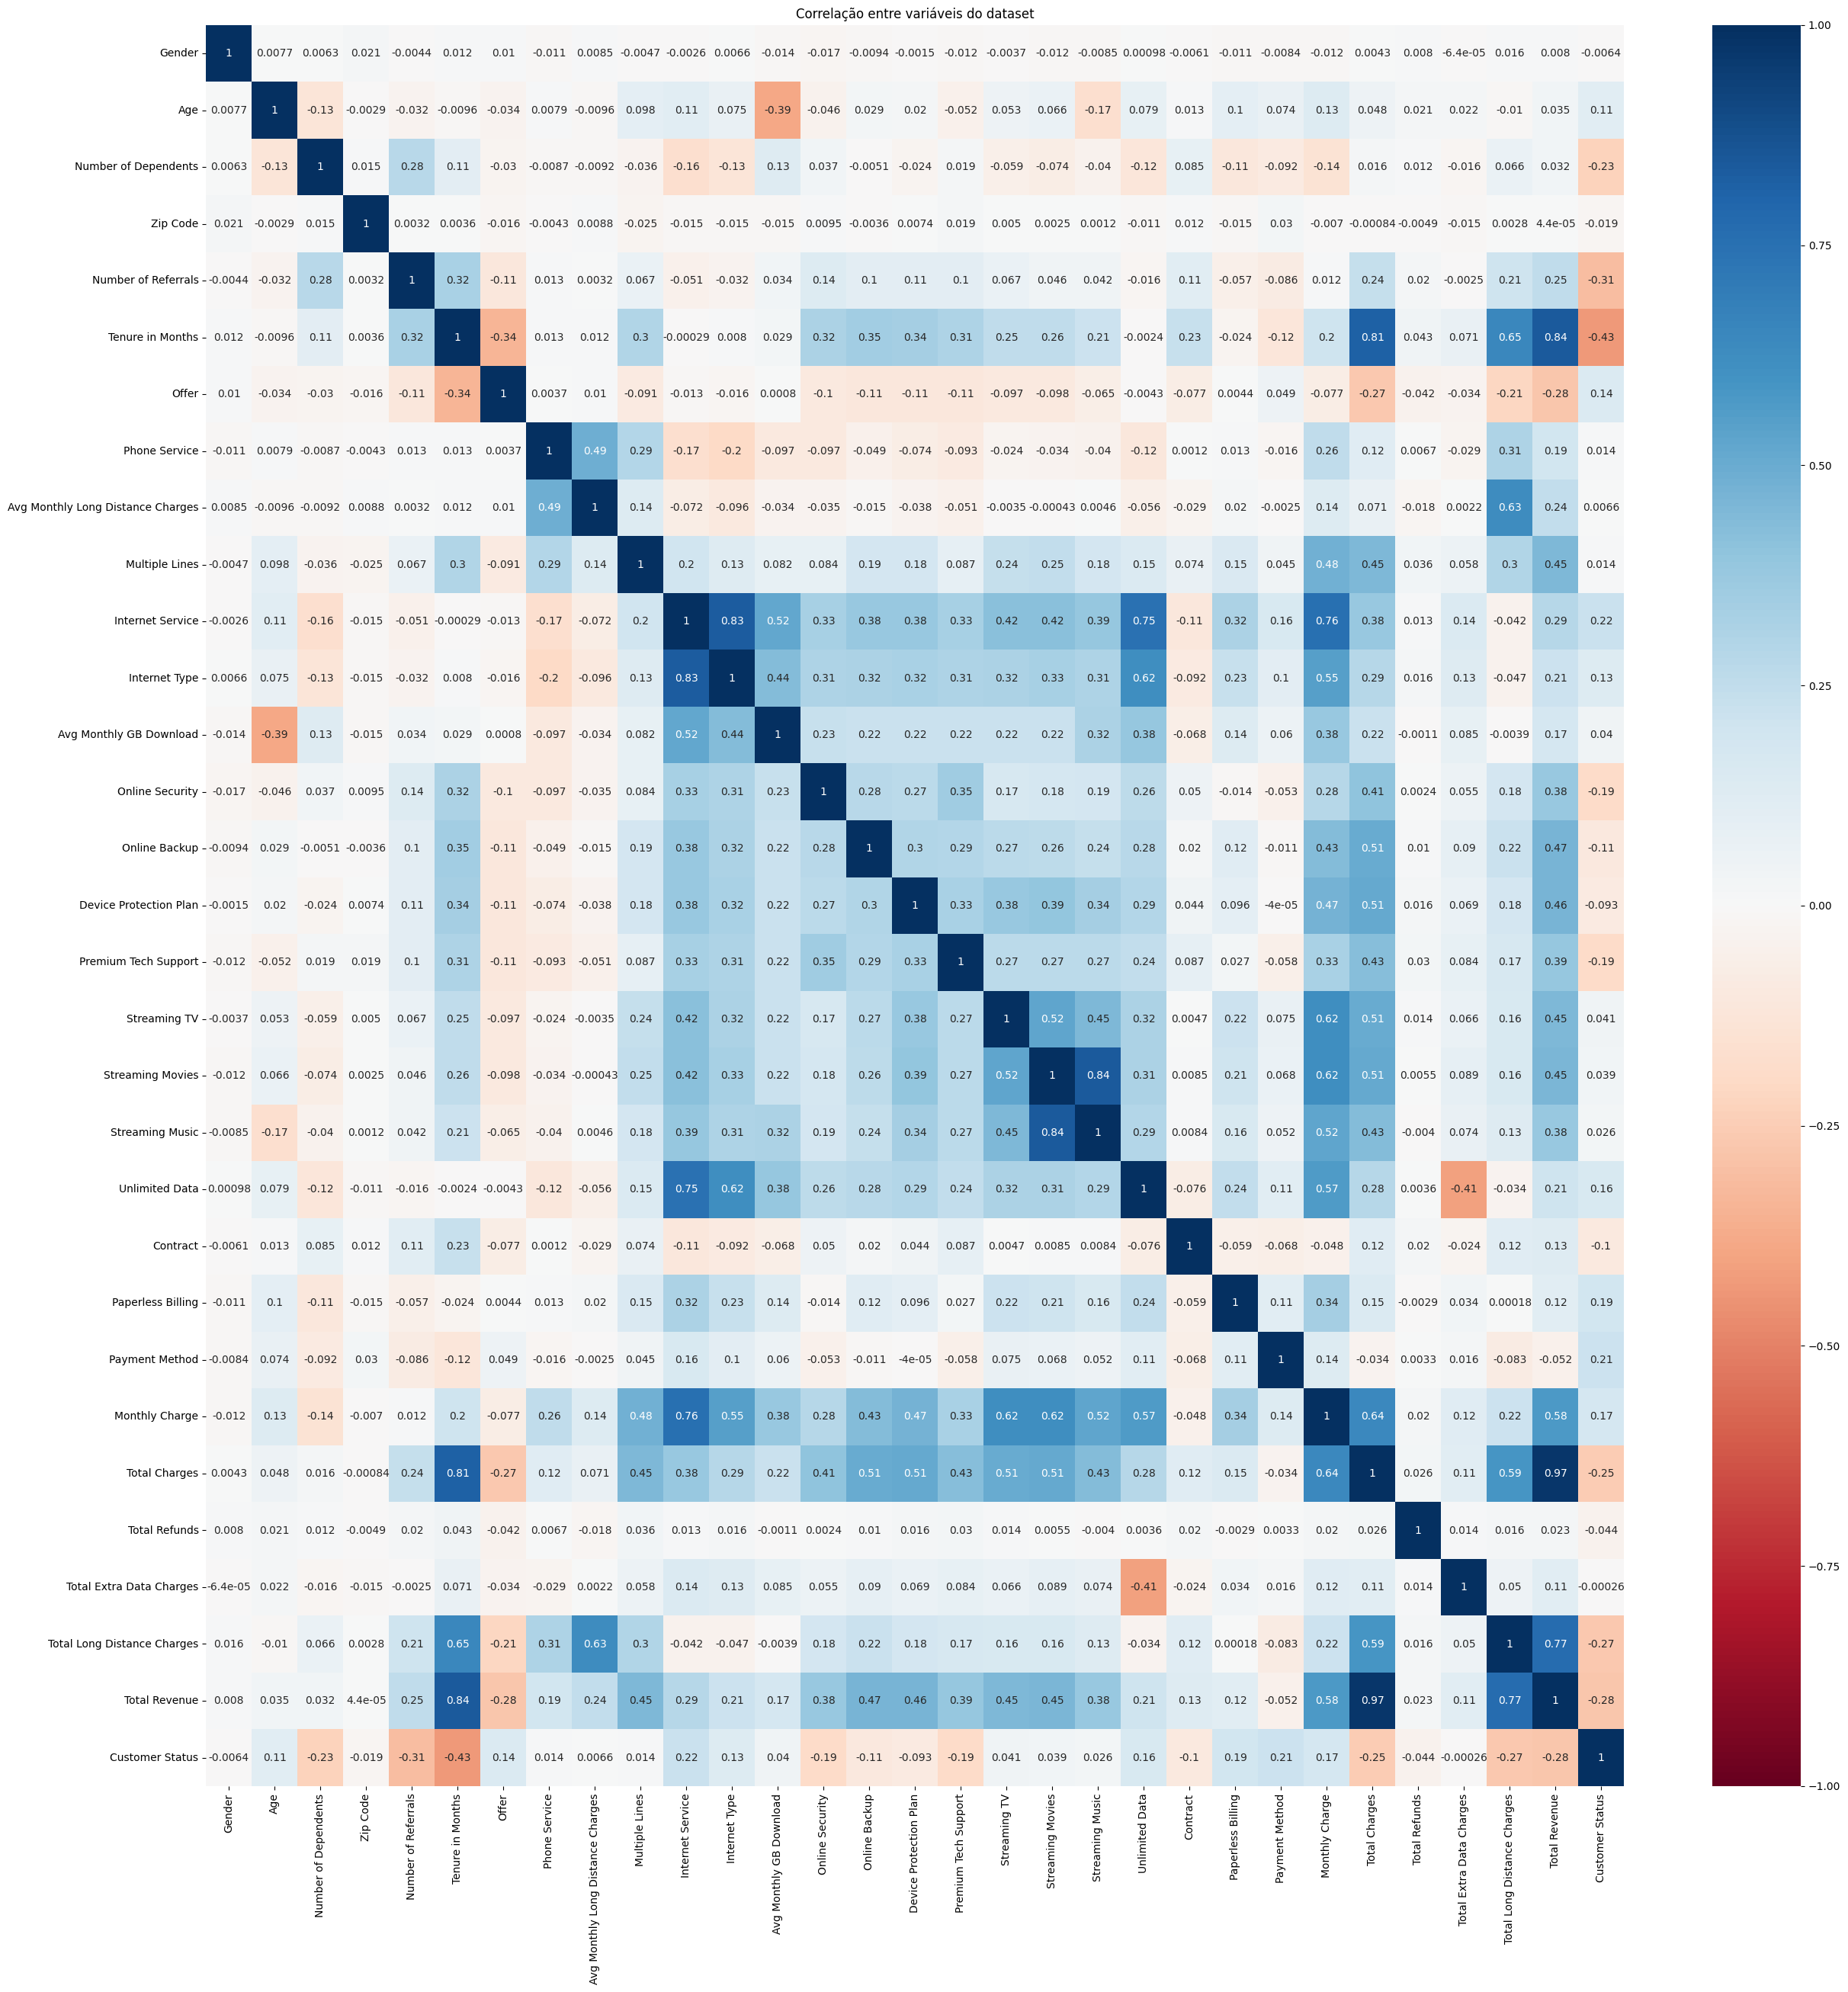

In [29]:
# matriz de correlação
plt.figure(figsize = (30,30))
sns.heatmap(dataset_numerico.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1 )
plt.title('Correlação entre variáveis do dataset')
plt.show()

Apenas o atributo "Tenure in months" (0,43) está moderadamente correlacionado com a variável de interesse. E os seguintes atributos estão fracamente correlacionados: Number of referrals" (0,31), "Total revenue" (0,28), "Total long distance charges" (0,27), "Total charges" (0,25), "Number os dependents" (0,23), "Internet service" (-0,22) e "Payment Method" (-0,21).

Apesar de apresentarem correlação bem fraca, também serão adicionados os atributos "Internet Type" e "Multiple Lines" por estarem relacionados com as hipóteses iniciais do problema quanto ao uso de tecnologias ultrapassadas e aos clientes pouco fidelizados (possuem apenas um serviço), e por serem informações de interesse para companhias de Telecom.

Vamos então construir um novo dataset apenas com essas informações para observar seu desempenho.



In [30]:
# Separando colunas de interesse
df_ft_corr = dataset_numerico[['Tenure in Months','Number of Referrals','Total Revenue',
                               'Total Long Distance Charges','Total Charges','Number of Dependents',
                               'Internet Service','Payment Method','Internet Type', 'Multiple Lines','Customer Status']]
# Observando novo dataset
df_ft_corr.head()

,Tenure in Months,Number of Referrals,Total Revenue,Total Long Distance Charges,Total Charges,Number of Dependents,Internet Service,Payment Method,Internet Type,Multiple Lines,Customer Status
0,9,2.0,974.81,381.51,593.30,0.0,1,0,1,0,0
1,9,0.0,610.28,96.21,542.40,0.0,1,0,1,1,0
2,4,0.0,415.45,134.60,280.85,0.0,1,1,2,0,1
3,13,1.0,1599.51,361.66,1237.85,0.0,1,1,2,0,1
4,3,3.0,289.54,22.14,267.40,0.0,1,0,2,0,1


##7.2) Separação entre treino e teste

Agora vamos aplicar os mesmos passos de separação de treino e teste e de construção de diferentes modelos.

In [31]:
# index da coluna alvo
df_ft_corr.columns.get_loc("Customer Status")

10

In [32]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset após tratamentos)
array = df_ft_corr.values
X_corr = array[:,0:10]
Y_corr = array[:,10]

# separando os conjuntos treino e teste
X__corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr, Y_corr,
    test_size=test_size, shuffle=True, random_state=seed)

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
# usando estratificação, visto que o dataset está com as classes desbalanceadas
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # faz o particionamento em 10 folds


##7.3) Construção do modelo de aprendizagem

LR: 0.811421 (0.009025)
KNN: 0.763611 (0.020526)
CART: 0.802888 (0.013093)
NB: 0.753369 (0.013886)
SVM: 0.767977 (0.012449)
Bagging: 0.840639 (0.009719)
RF: 0.841964 (0.012488)
ET: 0.829632 (0.011462)
Ada: 0.850126 (0.013279)
GB: 0.852781 (0.007277)
Voting: 0.818445 (0.014882)


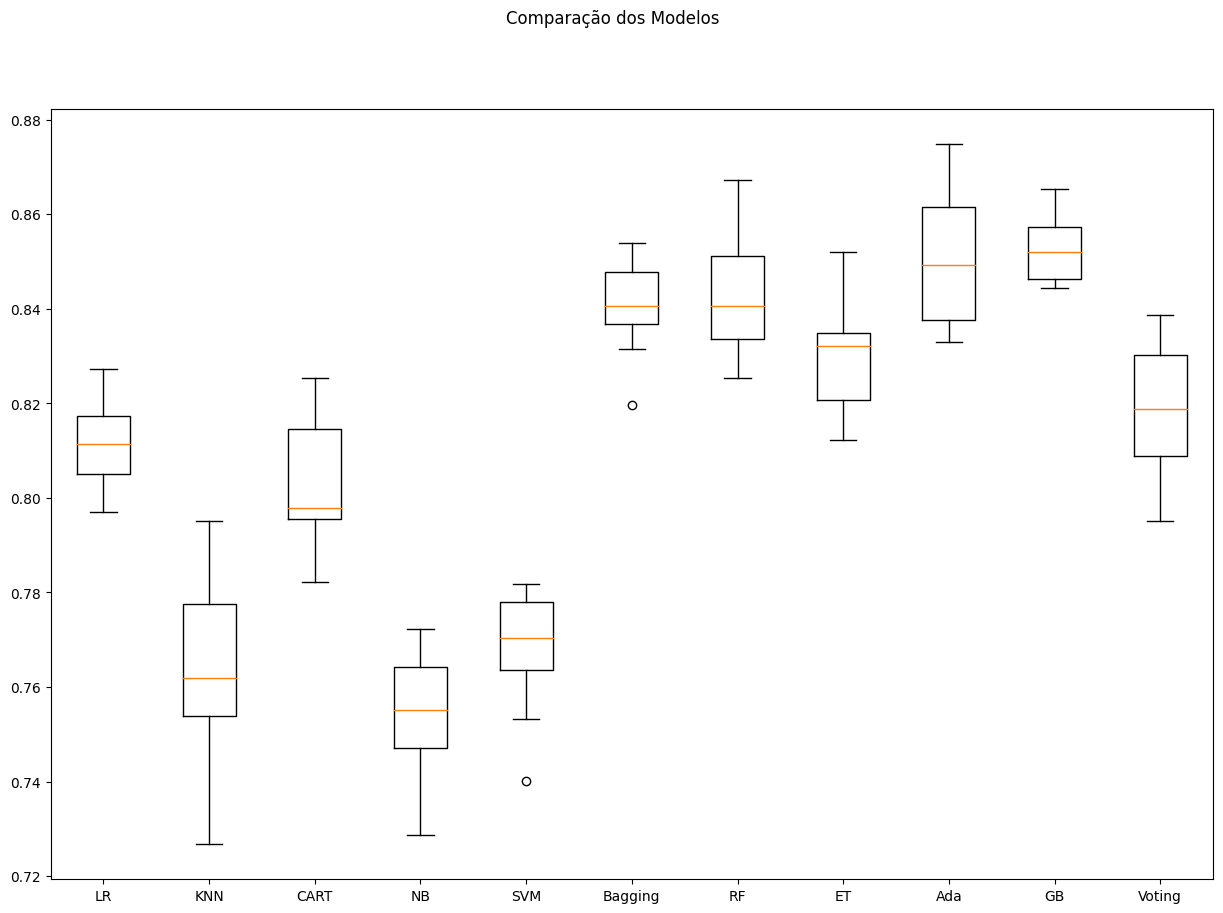

In [33]:
np.random.seed(7) # definindo uma semente global

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X__corr_train, y_corr_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com a seleção de atributos usando a correlação como critério, o ensemble GradientBoosting apresentou maior acurácia com média de 85,28% (intervalo de 83,82% a 86,73%).

Um ponto de atenção em relação a esse modelo é a menor acurácia em relação aos modelos construídos com todas as informações do dataset. É possível que não seja necessário realizar a redução de atributos. Mas vamos avaliar se outros tratamentos podem melhorar o desempenho dos modelos com o dataset submetido ao feature selection.


Vamos realizar o mesmo processo de comparação de modelos, com os dados originais, padronizados e normalizados, utilizando o dataset reduzido, para observar seu desempenho.

##7.4) Dados padronizados e normalizados

LR-orig: 0.81142 (0.00902)
KNN-orig: 0.76361 (0.02053)
CART-orig: 0.80289 (0.01309)
NB-orig: 0.75337 (0.01389)
SVM-orig: 0.76798 (0.01245)
Bag-orig: 0.84064 (0.00972)
RF-orig: 0.84196 (0.01249)
ET-orig: 0.82963 (0.01146)
Ada-orig: 0.85013 (0.01328)
GB-orig: 0.85278 (0.00728)
Vot-orig: 0.81844 (0.01488)
LR-padr: 0.81104 (0.01076)
KNN-padr: 0.82413 (0.01088)
CART-padr: 0.80155 (0.01049)
NB-padr: 0.75337 (0.01373)
SVM-padr: 0.82432 (0.01126)
Bag-padr: 0.84367 (0.00838)
RF-padr: 0.84310 (0.00929)
ET-padr: 0.83039 (0.01001)
Ada-padr: 0.85013 (0.01328)
GB-padr: 0.85278 (0.00728)
Vot-padr: 0.82584 (0.01217)
LR-norm: 0.81123 (0.00978)
KNN-norm: 0.83001 (0.00985)
CART-norm: 0.80725 (0.01370)
NB-norm: 0.75337 (0.01373)
SVM-norm: 0.82034 (0.01013)
Bag-norm: 0.84120 (0.00877)
RF-norm: 0.84310 (0.00945)
ET-norm: 0.83627 (0.01275)
Ada-norm: 0.85013 (0.01328)
GB-norm: 0.85240 (0.00759)
Vot-norm: 0.82280 (0.01036)


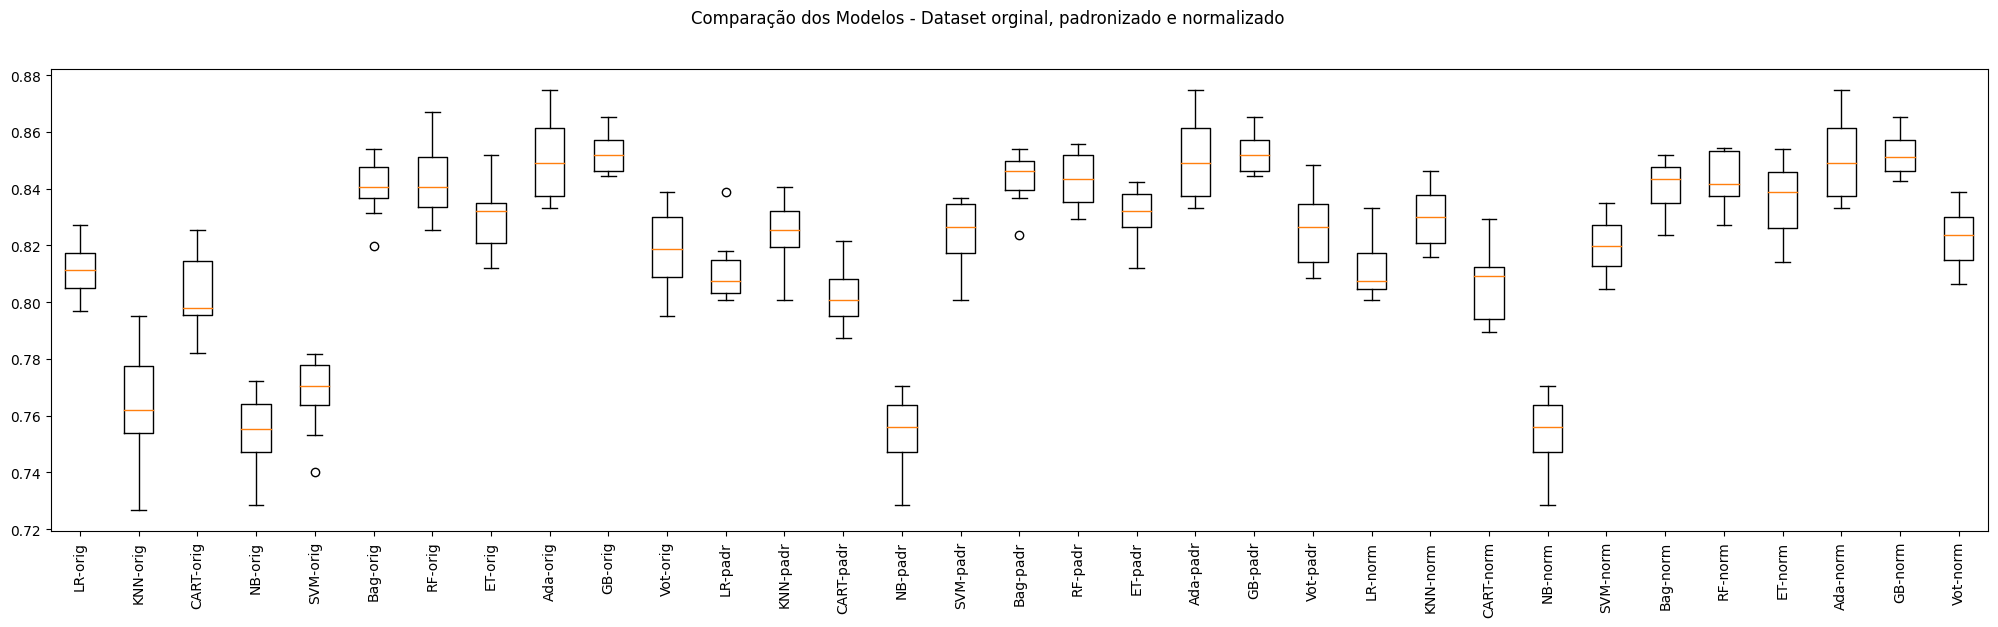

In [34]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X__corr_train, y_corr_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 5 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Observamos que o GradientBoosting com os dados originais e padronizados obtiveram mesmo resultado de acurácia e que os dados normalizados resultaram em uma redução de acurácia.

Vamos novamente testar fazendo o ajuste de hiperparâmetros.


##7.5) Otimização de hiperparâmetros

In [35]:
# Tuning do GradientBoosting

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))

params = {
    'GB__learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
    'GB__n_estimators': [100,200,300],
    'GB__max_depth': [3,5,7]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, n_jobs = -1, cv=kfold)
    grid.fit(X__corr_train, y_corr_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

GB-orig - Melhor: 0.852591 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
GB-padr - Melhor: 0.852781 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}
GB-norm - Melhor: 0.852402 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 100}


Observamos que a normalização teve melhor acurácia, com  o ajuste obtido ao determinar a taxa de aprendizado 0,1, o número máximo de nós igual a 3 e 100 interações de boosting.

Porém, o modelo sem otimização de parâmetros, obteve o mesmo resultado. Seguiremos as próximas analises usando suas especificações e os dados sem tratamento de padronização ou normalização, visto que, com as informações originais, chegamos no mesmo resultado para a acurácia média.

#8) Avaliação de métricas
Até o momento, observamos o desempenho dos modelos comparando os resultados para a acurácia.
Vamos observar agora como os melhores modelos (tanto para o dataset completo quanto para o dataset após o feature selection) desempenham em relação as outras métricas.



##8.1) Métricas do GradientBoosting com o dataset completo

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.8970    0.9434    0.9196      3783
         1.0     0.8344    0.7245    0.7755      1488

    accuracy                         0.8816      5271
   macro avg     0.8657    0.8339    0.8476      5271
weighted avg     0.8793    0.8816    0.8789      5271



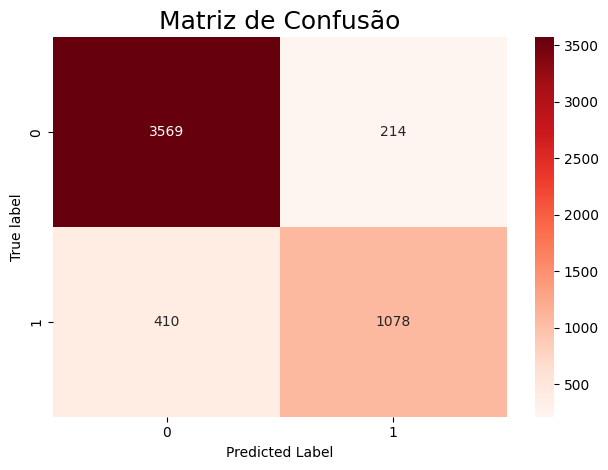

In [36]:
# importando bibliotecas necessárias
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.random.seed(7) # definindo uma semente global para este bloco

#definindo o modelo seguindo os critérios que resultaram em melhor acurácia ao serem treinados
# com todos os atributos do dataset
#GB__learning_rate': 0.1, 'GB__max_depth': 3, 'GB__n_estimators': 200}
model = GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 200, max_depth=3)
y_pred = cross_val_predict(model, X_train, y_train, cv = kfold)
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()


# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Além da acurácia estar em torno de 88%, a nossa classe de interesse (churn = 1), apresentou precisão de 83% e recall de 72%. Devido ao trade-off entre essas métricas, geralmente não é possível que ambas tenham alto score. Mas como podemos ver pelo valor de f1, há um meio termo entre as duas.

Pela matriz de confusão, pode-se perceber que as classes alvo se concentram mais nos quadrantes em que a classificação e a predição estavam iguais.

Podemos concluir que, no geral, o modelo apresenta um bom desempenho.

##8.2) Métricas do GradientBoosting com o dataset após feature selection

Relatório de classificação:
               precision    recall  f1-score   support

         0.0     0.8664    0.9397    0.9016      3783
         1.0     0.8048    0.6317    0.7078      1488

    accuracy                         0.8528      5271
   macro avg     0.8356    0.7857    0.8047      5271
weighted avg     0.8490    0.8528    0.8469      5271



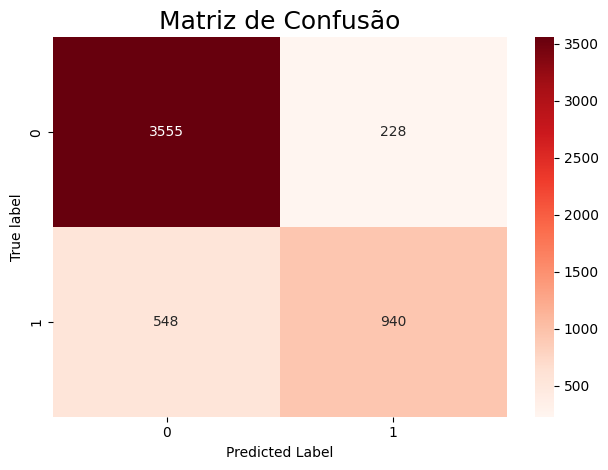

In [37]:
# importando bibliotecas necessárias
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.random.seed(7) # definindo uma semente global para este bloco

#definindo o modelo seguindo os critérios que resultaram em melhor acurácia
model = GradientBoostingClassifier(n_estimators=num_trees)
y_pred = cross_val_predict(model, X__corr_train, y_corr_train, cv = kfold)
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()


# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Para o modelo com redução de atributos por meio da feature selection, a acurácia média observada foi de 85%. A classe de interesse, apresentou precisão de 80% e recall de 63%.

Comparando os resultados com o modelo treinado com o dataset completo, podemos perceber que não houve uma melhor performance em nenhuma das métricas.

Seguiremos então com o a avaliação dos modelos usando o conjunto de teste.

#9) Avaliação do modelo com o conjunto de teste

##9.1) Avaliação usando modelo com dataset completo
Usaremos agora o conjunto de teste para observar como o modelo treinado interage com novos dados.

In [41]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 200, max_depth=3)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8884673748103187


Usando o conjunto de teste, o modelo apresentou acurácia dentro do intervalo esperado com resultado acima do obtido ao realizar o treinamento com a base de dados, indicando que não houve um overfitting.

##9.2) Avaliação do modelo com dataset após feature selection

In [43]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
GradientBoostingClassifier(n_estimators=num_trees)
model.fit(X__corr_train, y_corr_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_corr_test)
print(accuracy_score(y_corr_test, predictions))

0.8694992412746586


Usando o conjunto de teste obtido após a feature selection, o modelo também apresentou acurácia dentro do intervalo esperado, com resultado acima do obtido ao realizar o treinamento com a base de dados, indicando que não houve um overfitting. Porém, ainda assim, o desempenho foi inferior ao obtido pelo modelo que foi treinado e testado com todos os atributos do dataset.

Portanto, iremos preparar o modelo com todo o conjunto de dados usando todo o dataset.

#10) Preparação do modelo com todo o dataset

In [44]:
# Preparação do modelo com TODO o dataset
model.fit(X, Y)

GradientBoostingClassifier()

# 11) Conclusão
Com as análises realizadas com o dataset "telecom_customer_churn", podemos observar que o melhor modelo, avaliando as métricas de acurácia, precisão, recall e f1 score foi obtido ao treinar o GradientBoostingClassifier com o dataset completo e dados originais (sem transformações de normalização ou padronização), taxa de aprendizado 0,1, máximo de nós igual a 3 e 200 interações do tipo boosting.

O GradientBoosting é um modelo de ensemble do tipo sequencial que atua ajustando o modelo-base novo aos erros residuais cometidos pelo modelo-base anterior, tornando os modelos fracos em fortes. Atualmente, é considerado uma boa técnica para melhorar desempenho de modelos via ensemble.

É importante ressaltar que o processo de tuning do GradientBoosting foi feito de forma experimental variando apenas 3 parâmetros, mas que melhores métricas de avaliação de desempenho poderiam ser obtidas ao implementar diferentes valores para outros parâmetros desse modelo.
Devido às limitações do Collab, essas variações se tornaram inviáveis, uma vez que aumentam o tempo de processamento de forma considerável.

Além disso, observamos que a seleção de features não resultou em melhores métricas de avaliação de modelo. É possível que, usando outros métodos para seleção de atributos, como o recurso select kbest, outras informações do dataset fossem selecionadas e que o modelo usando esse novo conjunto obtivesse melhor desempenho. Caberia uma análise realizando essas variações, mas devido ao tempo limitado para desenvolvimento do projeto, não foram testadas todas as possibilidades.

Por fim, podemos considerar que o modelo escolhido obteve bom desempenho com novos dados, ao prever os resultados do conjunto de teste, não apresentando overfitting. Levando em consideração os pontos levantados anteriormente, ainda seria possível fazer melhorias antes de implementação do modelo, mas com os recursos atuais, ele estaria apto para realizar predições para novos clientes.
